# Image classification with tensorflow

This is one of the tutorials available on Tensorflow's website. This tutorial covers :
* Accesing image data 
* Displaying image data
* Splitting data into train and validation sets
* Scaling data 
* Building a convolutional neural network model 
* Training the model 
* Evaluating Training and validation accuracy and loss 
* Identify overfitting 
* Using data augmentation to generate slightly altered data from the original dataset to combat overfitting
* Adding Dropout layer as a form of regularization 

https://www.tensorflow.org/tutorials/images/classification?hl=en 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir=pathlib.Path(data_dir)

228818944/228813984 [==============================] - 36s 0us/step


In [4]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


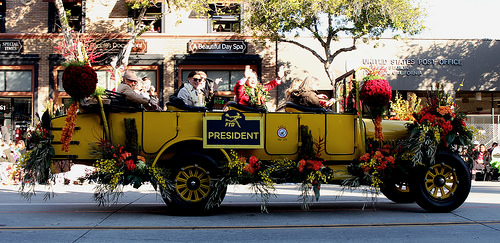

In [5]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

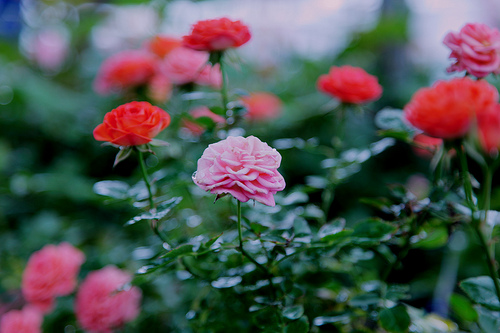

In [6]:
PIL.Image.open(str(roses[1]))

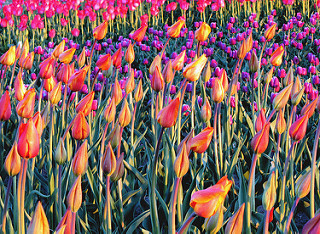

In [7]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

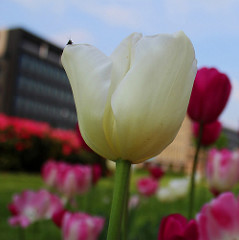

In [9]:
PIL.Image.open(str(tulips[1]))

# Loading images off disk to a tf.data.Dataset

In [10]:
batch_size=32
img_height=180
img_width=180

In [63]:
data_dir

PosixPath('/Users/yumseemun/.keras/datasets/flower_photos')

In [14]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset='training',
seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [15]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset='validation',
seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [18]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


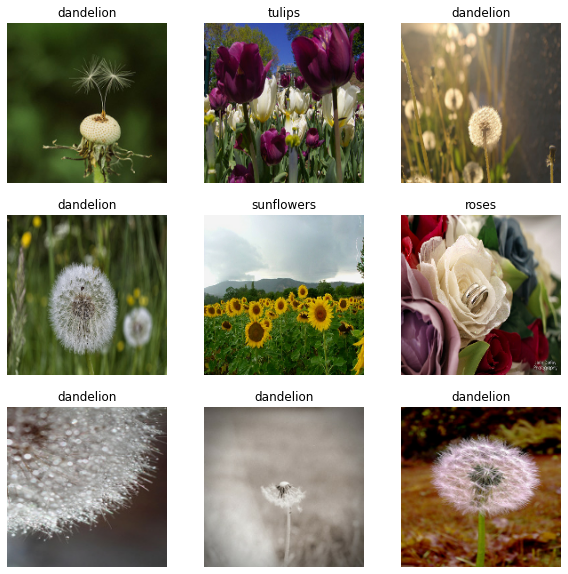

In [64]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [65]:
for image_batch,labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [26]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
normalization_layer=layers.experimental.preprocessing.Rescaling(1./255)

In [33]:
normalized_ds=train_df.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))

0.009804222 1.0


In [77]:
a=np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])

In [36]:
num_classes=5
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [37]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [40]:
epochs=10
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


2021-08-10 12:28:33.302612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 58 of 1000
2021-08-10 12:28:38.661722: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


92/92 [==============================] - 157s 1s/step - loss: 1.4168 - accuracy: 0.3859 - val_loss: 1.2185 - val_accuracy: 0.4850
Epoch 2/10
92/92 [==============================] - 84s 901ms/step - loss: 1.0718 - accuracy: 0.5678 - val_loss: 0.9854 - val_accuracy: 0.5899
Epoch 3/10
92/92 [==============================] - 97s 1s/step - loss: 0.9066 - accuracy: 0.6550 - val_loss: 0.9392 - val_accuracy: 0.6281
Epoch 4/10
92/92 [==============================] - 82s 889ms/step - loss: 0.7677 - accuracy: 0.7132 - val_loss: 0.9341 - val_accuracy: 0.6431
Epoch 5/10
92/92 [==============================] - 92s 995ms/step - loss: 0.5460 - accuracy: 0.7994 - val_loss: 0.8785 - val_accuracy: 0.6717
Epoch 6/10
92/92 [==============================] - 87s 930ms/step - loss: 0.3447 - accuracy: 0.8774 - val_loss: 1.0590 - val_accuracy: 0.6649
Epoch 7/10
92/92 [==============================] - 78s 847ms/step - loss: 0.2050 - accuracy: 0.9322 - val_loss: 1.1848 - val_accuracy: 0.6499
Epoch 8/10
92/9

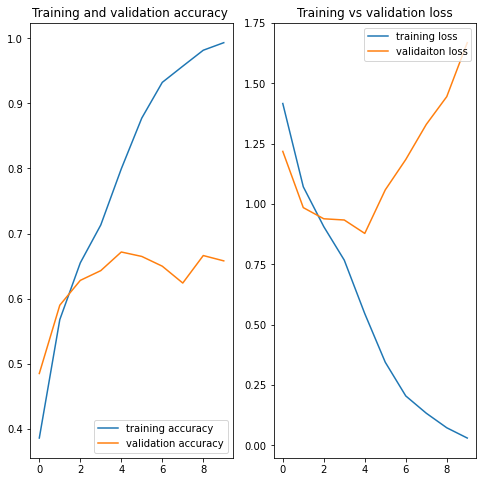

In [45]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy ')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validaiton loss')
plt.legend(loc='upper right')
plt.title('Training vs validation loss')
plt.show()

Training accuracy is increasing linearly over time, validaiton accuracy stalls at 60%. Differnece between accuracy in training and validation set is large, a sign of overfitting. 

Model might learn from noises or unwanted details from training examples. We will use data augmentation and add dropout to our model to combat overfitting. 

# Data augmentation

Generating additional training data from existing examples by augmenting them using random transformations. Expose model to more aspects of the data and generalize better. 


In [48]:
data_augmentation= keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),
layers.experimental.preprocessing.RandomRotation(0.1),
layers.experimental.preprocessing.RandomZoom(0.1),])

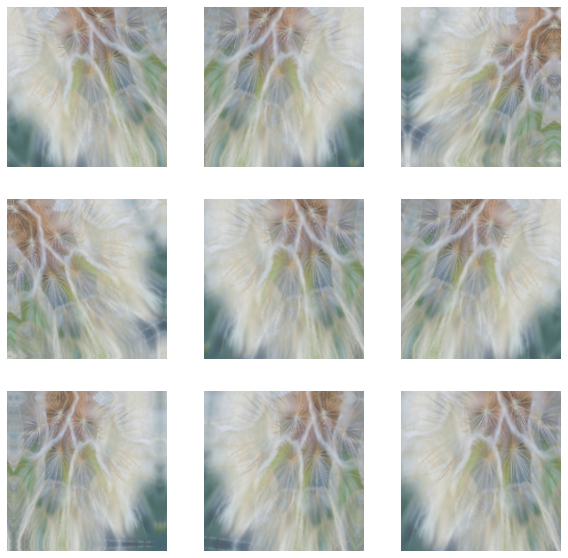

In [52]:
plt.figure(figsize=(10,10))
for images,_ in train_df.take(1):
    for i in range(9):
        augmented_images=data_augmentation(images)
        ax=plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

# Dropout 

A form of regularization. Apply Dropout to layer it randomly drops out (by setting activation to zero) a number of output units from the layer during training process. Dropout takes a fractional number and drops out that fraction out output units randomly from the appled layer. 

In [54]:
model=Sequential([data_augmentation, 
layers.experimental.preprocessing.Rescaling(1./255),
layers.Conv2D(16,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32,3,padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])

In [55]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 64)       

In [57]:
epochs=15
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/15
92/92 [==============================] - 126s 1s/step - loss: 1.2862 - accuracy: 0.4629 - val_loss: 1.1339 - val_accuracy: 0.5313
Epoch 2/15
92/92 [==============================] - 135s 1s/step - loss: 1.0086 - accuracy: 0.6032 - val_loss: 0.9418 - val_accuracy: 0.6294
Epoch 3/15
92/92 [==============================] - 163s 2s/step - loss: 0.8971 - accuracy: 0.6519 - val_loss: 0.9741 - val_accuracy: 0.6376
Epoch 4/15
92/92 [==============================] - 210s 2s/step - loss: 0.8386 - accuracy: 0.6761 - val_loss: 0.8673 - val_accuracy: 0.6580
Epoch 5/15
92/92 [==============================] - 127s 1s/step - loss: 0.7901 - accuracy: 0.7030 - val_loss: 0.8676 - val_accuracy: 0.6853
Epoch 6/15
92/92 [==============================] - 133s 1s/step - loss: 0.7473 - accuracy: 0.7238 - val_loss: 0.7839 - val_accuracy: 0.6880
Epoch 7/15
92/92 [==============================] - 118s 1s/step - loss: 0.7192 - accuracy: 0.7234 - val_loss: 0.8969 - val_accuracy: 0.6948
Epoch 8/15
92

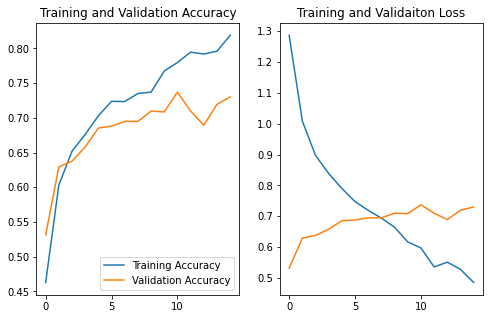

In [59]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training loss')
plt.plot(epochs_range,val_acc,label='Validaiton Loss')
plt.title('Training and Validaiton Loss')
plt.show()

In [75]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.preprocessing.image.load_img(sunflower_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

TypeError: __array__() takes 1 positional argument but 2 were given

In [70]:
import PIL